## Global

In [3]:
# Import das bibliotecas base:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [4]:
#Import dos arquivos csv
pilotos = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/pilotos.csv')
piloto_classificacoes = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/piloto_classificacoes.csv')
corridas = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/corridas.csv')
sprint_resultados = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/sprint_resultados.csv')
circuitos = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/circuitos.csv') 
tempo_por_volta = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/tempo_por_volta.csv') 
parada_boxes = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/parada_boxes.csv')
qualificacao = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/qualificacao.csv') 
resultados = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/resultados.csv')
construtores = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/construtores.csv')
construtor_classificacoes = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/construtor_classificacoes.csv')
construtor_resultados = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/construtor_resultados.csv')

## Machine Learning

In [10]:
resultados

,Unnamed: 0,result_id,corridas_id,piloto_id,construtor_id,numero,grid,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,rank,volta_rapida_tempo,volta_rapida_velocidade,status_id
0,0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26075,26081,1110,817,213,3.0,19,16.0,16,16,0.0,44,+1:43.071,5053521.0,25.0,15.0,1:50.994,227.169,1
26076,26076,26082,1110,858,3,2.0,18,17.0,17,17,0.0,44,+1:44.476,5054926.0,37.0,9.0,1:50.486,228.213,1
26077,26077,26083,1110,807,210,27.0,0,18.0,18,18,0.0,44,+1:50.450,5060900.0,26.0,4.0,1:49.907,229.415,1
26078,26078,26084,1110,832,6,55.0,4,NaN,R,19,0.0,23,NaN,NaN,9.0,19.0,1:53.138,222.864,130


In [5]:
resultados = resultados.dropna(subset=['volta_rapida_tempo'])
resultados['volta_rapida_tempo'] = resultados['volta_rapida_tempo'].str.split(':').apply(lambda x: int(x[0])*60 + float(x[1]))

Epoch 1/25
947/947 [==============================] - 12s 10ms/step - loss: 0.0032
Epoch 2/25
947/947 [==============================] - 9s 10ms/step - loss: 0.0018
Epoch 3/25
947/947 [==============================] - 9s 10ms/step - loss: 0.0016
Epoch 4/25
947/947 [==============================] - 9s 10ms/step - loss: 0.0015
Epoch 5/25
947/947 [==============================] - 9s 10ms/step - loss: 0.0015
Epoch 6/25
947/947 [==============================] - 10s 10ms/step - loss: 0.0015
Epoch 7/25
947/947 [==============================] - 10s 10ms/step - loss: 0.0014
Epoch 8/25
947/947 [==============================] - 11s 11ms/step - loss: 0.0014
Epoch 9/25
947/947 [==============================] - 10s 10ms/step - loss: 0.0014
Epoch 10/25
947/947 [==============================] - 10s 11ms/step - loss: 0.0014
Epoch 11/25
947/947 [==============================] - 9s 10ms/step - loss: 0.0013
Epoch 12/25
947/947 [==============================] - 9s 10ms/step - loss: 0.0013
Epoch 1

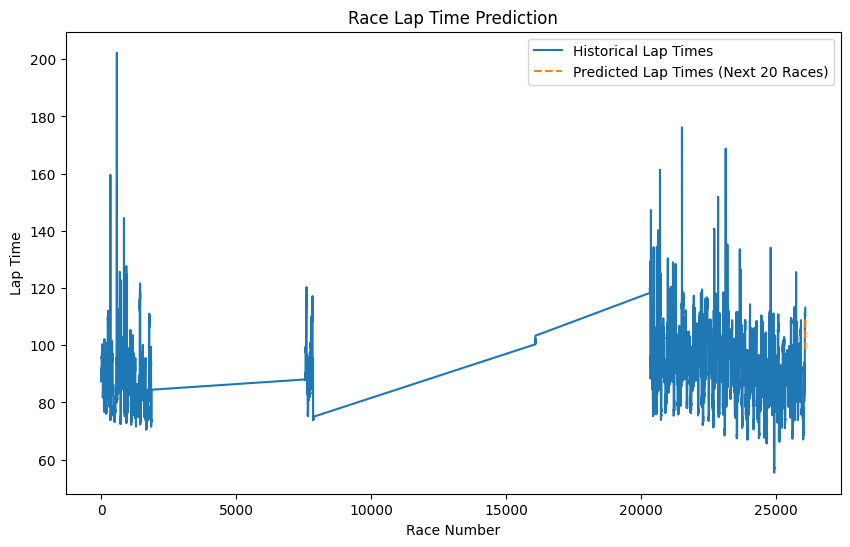

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(resultados['volta_rapida_tempo'].values.reshape(-1, 1))

# Preparar dados para o modelo
x_train, y_train = [], []
for i in range(40, len(scaled_data)):
    x_train.append(scaled_data[i-40:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape para atender aos padrões do TensorFlow
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Criar modelo RNN
model = Sequential()
model.add(LSTM(units=25, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=25, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(x_train, y_train, epochs=25, batch_size=16)

# Prever tempos de corrida futuros (próximas 20 corridas)
future_races = 10
x_future = scaled_data[-40:].reshape(1, -1, 1)
predictions = []

for _ in range(future_races):
    prediction = model.predict(x_future)
    predictions.append(prediction)
    x_future = np.append(x_future[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Desescalar as previsões
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Criar índice de corridas para plotagem
start_index = 23000
race_index = np.arange(start=resultados.index[-1]+1, stop=resultados.index[-1]+future_races+1)

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(resultados.index, resultados['volta_rapida_tempo'], label='Historical Lap Times')
plt.plot(race_index, predictions, label='Predicted Lap Times (Next 20 Races)', linestyle='dashed')
plt.title('Race Lap Time Prediction')
plt.xlabel('Race Number')
plt.ylabel('Lap Time')
plt.legend()
plt.show()

Epoch 1/100
8/8 [==============================] - 2s 8ms/step - loss: 0.1829
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1318
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1098
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1083
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0987
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0991
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0984
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0980
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0970
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0987
Epoch 11/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0990
Epoch 12/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0969
Epoch 13/100
8/8 [==============================] - 0s 7ms/st

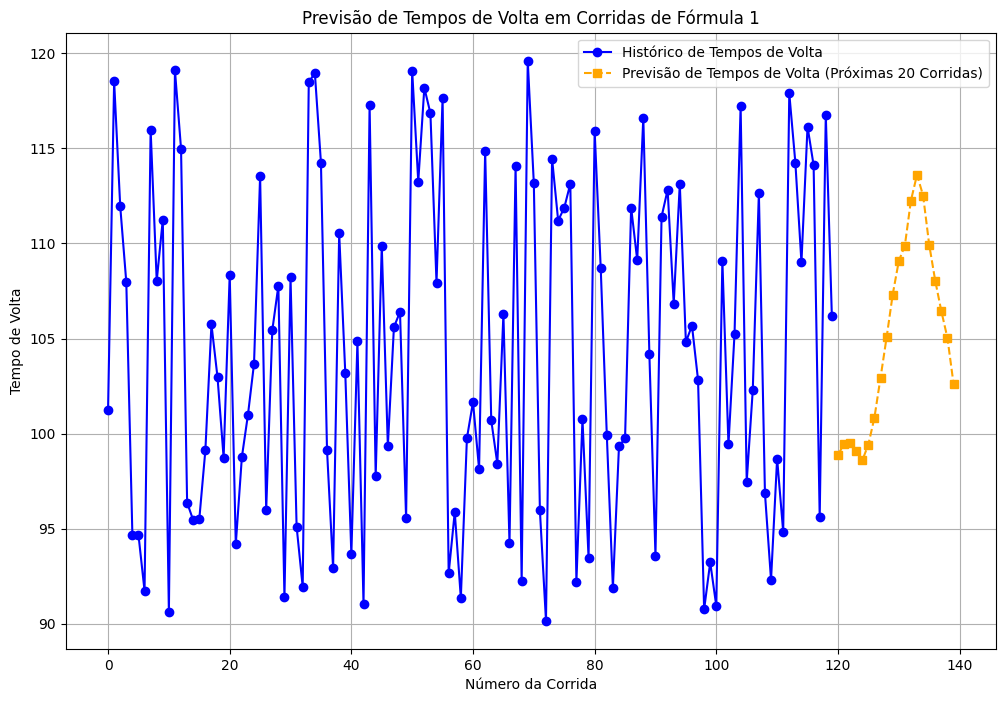

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Supondo que você tenha uma tabela 'tb_races' com as colunas necessárias
# raceId, circuitId, date, time, fp1_date, fp1_time
# Vou criar um exemplo fictício para ilustrar o processo

# ... (o código para gerar dados fictícios permanece o mesmo)

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_races['lap_time'].values.reshape(-1, 1))

# Preparar dados para o modelo
x_train, y_train = [], []
for i in range(40, len(scaled_data)):
    x_train.append(scaled_data[i-40:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape para atender aos padrões do TensorFlow
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Criar modelo RNN
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(x_train, y_train, epochs=100, batch_size=10)

# Prever tempos de corrida futuros (próximas 20 corridas)
future_races = 20
x_future = scaled_data[-40:].reshape(1, -1, 1)
predictions = []

for _ in range(future_races):
    prediction = model.predict(x_future)
    predictions.append(prediction)
    x_future = np.append(x_future[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Desescalar as previsões
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Criar índice de corridas para plotagem
race_index = np.arange(start=df_races.index[-1]+1, stop=df_races.index[-1]+future_races+1)

# Plotar resultados aprimorados
plt.figure(figsize=(12, 8))
plt.plot(df_races.index, df_races['lap_time'], label='Histórico de Tempos de Volta', marker='o', linestyle='-', color='blue')
plt.plot(race_index, predictions, label='Previsão de Tempos de Volta (Próximas 20 Corridas)', linestyle='dashed', marker='s', color='orange')
plt.title('Previsão de Tempos de Volta em Corridas de Fórmula 1')
plt.xlabel('Número da Corrida')
plt.ylabel('Tempo de Volta')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_races['lap_time'].values.reshape(-1, 1))

# Preparar dados para o modelo
x_train, y_train = [], []
for i in range(40, len(scaled_data)):
    x_train.append(scaled_data[i-40:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape para atender aos padrões do TensorFlow
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Criar modelo RNN
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(x_train, y_train, epochs=100, batch_size=10)

# Prever tempos de corrida futuros (próximas 20 corridas)
future_races = 100
x_future = scaled_data[-40:].reshape(1, -1, 1)
predictions = []

for _ in range(future_races):
    prediction = model.predict(x_future)
    predictions.append(prediction)
    x_future = np.append(x_future[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Desescalar as previsões
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Criar índice de corridas para plotagem
race_index = np.arange(start=df_races.index[-1]+1, stop=df_races.index[-1]+future_races+1)

# Plotar resultados com mais ênfase na previsão
plt.figure(figsize=(12, 8))
plt.plot(df_races.index, df_races['lap_time'], label='Histórico de Tempos de Volta', marker='o', linestyle='-', color='gray', alpha=0.7)
plt.plot(race_index, predictions, label='Previsão de Tempos de Volta (Próximas 100 Corridas)', linestyle='dashed', marker='s', color='orange', linewidth=2.5)
plt.title('Previsão de Tempos de Volta em Corridas de Fórmula 1')
plt.xlabel('Número da Corrida')
plt.ylabel('Tempo de Volta')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'df_races' is not defined

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep, time
from sklearn.preprocessing import MinMaxScaler

class SOM:
    def __init__(self, data_in, grid=(10, 10), alpha=0.1, sigma=None):
        dim = data_in.shape[1]
        self.w_nodes = np.random.uniform(-1, 1, [grid[0], grid[1], dim])
        self.alpha0 = alpha
        if sigma is None:
            self.sigma0 = max(grid) / 2.0
        else:
            self.sigma0 = sigma
        self.data_in = np.asarray(data_in)
        self.grid = grid

    def train(self, max_it=100, verbose=True, analysis=False, time_sleep=0.5):
        n_samples = self.data_in.shape[0]
        m = self.w_nodes.shape[0]
        n = self.w_nodes.shape[1]

        time_cte = (max_it / np.log(self.sigma0))
        if analysis:
            print(f"- time_cte = {time_cte}")

        time_init = 0
        time_end = 0
        for epc in range(max_it):
            alpha = self.alpha0 * np.exp(-epc / time_cte)
            sigma = self.sigma0 * np.exp(-epc / time_cte)
            if verbose:
                print(f"- Epoch: {epc}\n- Expected time: {(time_end - time_init) * (max_it - epc)} sec")
            time_init = time()

            for k in range(n_samples):
                mat_dist = self.distance(self.data_in[k, :], self.w_nodes)
                pos_win = self.get_win_node_pos(mat_dist)
                deltaW = 0
                h = 0
                for i in range(m):
                    for j in range(n):
                        dNode = self.get_distance_nodes([i, j], pos_win)

                        h = np.exp((-dNode ** 2) / (2 * sigma ** 2))

                        deltaW = (alpha * h * (self.data_in[k, :] - self.w_nodes[i, j, :]))
                        self.w_nodes[i, j, :] += deltaW

                        if analysis:
                            print('Epoch =', epc)
                            print('Sample =', k)
                            print('-' * 50)
                            print('alpha =', alpha)
                            print('sigma =', sigma)
                            print('h =', h)
                            print('-' * 50)
                            print(f'Winner Node = [{pos_win[0]},{pos_win[1]}]')
                            print(f'Current Node = [{i},{j}]')
                            print('dist. nodes =', dNode)
                            print('deltaW =', deltaW)
                            print('wNode before =', self.w_nodes[i, j, :])
                            print('wNode after =', self.w_nodes[i, j, :] + deltaW)
                            print('\n')
                            sleep(time_sleep)

            time_end = time()

    def distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2, axis=2, keepdims=True))

    def get_distance_nodes(self, n1, n2):
        n1 = np.asarray(n1)
        n2 = np.asarray(n2)
        return np.sqrt(np.sum((n1 - n2) ** 2))

    def get_win_node_pos(self, dists):
        arg = dists.argmin()
        m = dists.shape[0]
        return arg // m, arg % m

    def get_centroid(self, data):
        data = np.asarray(data)
        N = data.shape[0]
        centroids = list()

        for k in range(N):
            matDist = self.distance(data[k, :], self.w_nodes)
            centroids.append(self.get_win_node_pos(matDist))

        return centroids


# Criar dados fictícios de tempos de volta dos pilotos
np.random.seed(42)
data = np.random.uniform(90, 120, size=(100,))
df_drivers = pd.DataFrame({
    'driverId': range(1, 101),
    'forename': ['Driver'] * 100,
    'surname': ['Test'] * 100,
    'dob': pd.to_datetime(['1990-01-01'] * 100),
    'nationality': ['Test'] * 100,
    'lap_time': data
})

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_drivers['lap_time'].values.reshape(-1, 1))

# Preparar dados para o modelo
x_train, y_train = [], []
for i in range(40, len(scaled_data)):
    x_train.append(scaled_data[i-40:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape para atender aos padrões do TensorFlow
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Criar modelo RNN
som_model = SOM(data_in=x_train, grid=(5, 5), alpha=0.1)

# Treinar o modelo
som_model.train(max_it=1000, verbose=True, analysis=False, time_sleep=0.5)

# Obter os centróides dos pilotos
centroids = som_model.get_centroid(x_train)

# Adicionar informações do piloto ao DataFrame
df_drivers['centroid'] = centroids

# Plotar resultados
plt.figure(figsize=(10, 6))
for index, row in df_drivers.iterrows():
    plt.scatter(row['dob'], row['lap_time'], label=f"{row['forename']} {row['surname']}", c=[row['centroid']], cmap='viridis', s=100)

plt.title('Driver Performance Clusters')
plt.xlabel('Date of Birth')
plt.ylabel('Scaled Lap Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


- Epoch: 0
- Expected time: 0 sec


ValueError: operands could not be broadcast together with shapes (40,1) (5,5,40) 

1/1 [==============================] - 0s 31ms/step
Mean Squared Error: 161.2988819064983


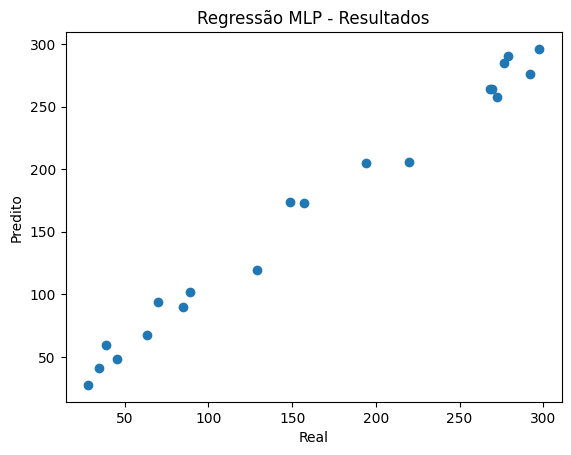

In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Gerar dados de exemplo
np.random.seed(42)
velocidade = np.random.rand(100, 1) * 100  # Velocidade
tempo = np.random.rand(100, 1) * 10  # Tempo
pit_stop = np.random.rand(100, 1) * 5  # Pit-Stop

# Simular uma relação linear simples com algum ruído
target = 3 * velocidade + 2 * tempo + 5 * pit_stop + np.random.randn(100, 1) * 5

# Dividir os dados em conjunto de treinamento e teste
X = np.hstack((velocidade, tempo, pit_stop))
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Construir o modelo MLP
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Avaliar o modelo no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualizar resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Regressão MLP - Resultados')
plt.show()

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Supondo que você tenha um DataFrame chamado 'resultados' com uma coluna 'volta_rapida_tempo'

# Verificar e converter para string, se necessário
resultados['volta_rapida_tempo'] = resultados['volta_rapida_tempo'].astype(str)

# Normalizar os dados
resultados = resultados.dropna(subset=['volta_rapida_tempo'])

def convert_to_minutes(time_str):
    parts = time_str.split(':')
    if len(parts) == 2:
        return float(parts[0]) * 60 + float(parts[1])
    elif len(parts) == 3:
        return float(parts[0]) * 60 + float(parts[1] + '.' + parts[2])
    else:
        return None

resultados['volta_rapida_tempo'] = resultados['volta_rapida_tempo'].apply(convert_to_minutes)

# Remover linhas com valores nulos
resultados = resultados.dropna(subset=['volta_rapida_tempo'])

if len(resultados) > 0:
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(resultados['volta_rapida_tempo'].values.reshape(-1, 1))

    # Restante do código...
    # Continue com o restante do seu código aqui

    # Por exemplo:
    x_train, y_train = [], []
    for i in range(40, len(scaled_data)):
        x_train.append(scaled_data[i-40:i, 0])
        y_train.append(scaled_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape para atender aos padrões do TensorFlow
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Criar modelo RNN
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Treinar o modelo
    model.fit(x_train, y_train, epochs=50, batch_size=8)

    # Restante do código...
    # Continue com o restante do seu código aqui
    # Certifique-se de ter amostras suficientes para continuar

    # Por exemplo:
    future_races = 20
    x_future = scaled_data[-40:].reshape(1, -1, 1)
    predictions = []

    for _ in range(future_races):
        prediction = model.predict(x_future)
        predictions.append(prediction)
        x_future = np.append(x_future[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

    # Desescalar as previsões
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    # Criar índice de corridas para plotagem
    start_index = 1
 # Substitua 1000 pelo índice desejado para iniciar a visualização
    race_index = np.arange(start=start_index, stop=start_index+future_races)

    # Plotar resultados
    plt.figure(figsize=(10, 6))
    plt.plot(race_index, predictions, label='Predicted Lap Times (Next 20 Races)', linestyle='dashed')
    plt.title('Race Lap Time Prediction')
    plt.xlabel('Race Number')
    plt.ylabel('Lap Time')
    plt.legend()
    plt.show()
else:
    print("Não há amostras suficientes para normalizar.")


Não há amostras suficientes para normalizar.


Epoch 1/10
64/64 [==============================] - 3s 13ms/step - loss: 0.0091
Epoch 2/10
64/64 [==============================] - 1s 13ms/step - loss: 0.0039
Epoch 3/10
64/64 [==============================] - 1s 13ms/step - loss: 0.0031
Epoch 4/10
64/64 [==============================] - 1s 13ms/step - loss: 0.0026
Epoch 5/10
64/64 [==============================] - 1s 13ms/step - loss: 0.0024
Epoch 6/10
64/64 [==============================] - 1s 13ms/step - loss: 0.0023
Epoch 7/10
64/64 [==============================] - 1s 13ms/step - loss: 0.0022
Epoch 8/10
64/64 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 9/10
64/64 [==============================] - 1s 13ms/step - loss: 0.0020
Epoch 10/10
1/1 [==============================] - 0s 15ms/step


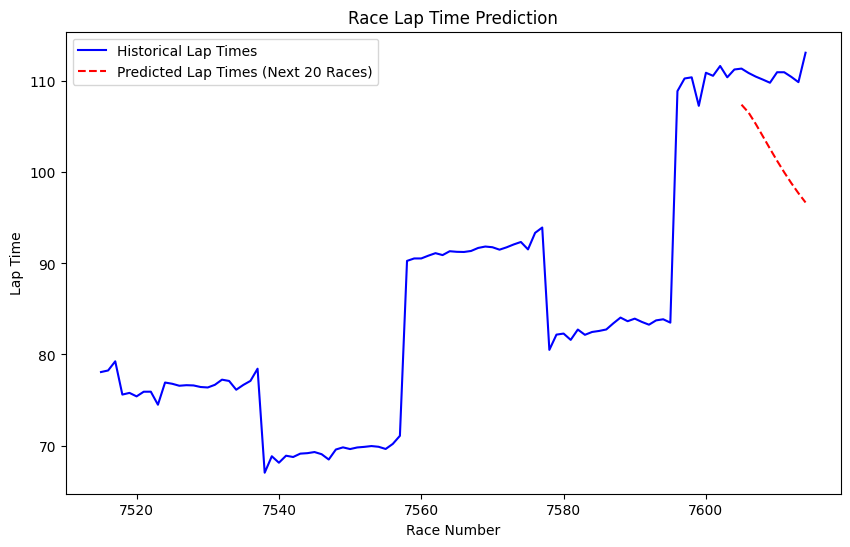

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Supondo que você tenha um DataFrame chamado 'resultados' com uma coluna 'volta_rapida_tempo'

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(resultados['volta_rapida_tempo'].values.reshape(-1, 1))

# Preparar dados para o modelo
x_train, y_train = [], []
for i in range(40, len(scaled_data)):
    x_train.append(scaled_data[i-40:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape para atender aos padrões do TensorFlow
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Criar modelo RNN
model = Sequential()
model.add(LSTM(units=25, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=25, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(x_train, y_train, epochs=10, batch_size=120)

# Prever tempos de corrida futuros (próximas 20 corridas)
future_races = 10
x_future = scaled_data[-40:].reshape(1, -1, 1)
predictions = []

for _ in range(future_races):
    prediction = model.predict(x_future)
    predictions.append(prediction[0, 0])  # Ajuste para extrair o valor escalar da previsão
    x_future = np.append(x_future[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Desescalar as previsões
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Criar índice de corridas para plotagem
start_index = max(0, len(resultados) - 100)  # Mostrar apenas as últimas 100 corridas
end_index = len(resultados)
race_index = np.arange(start=start_index, stop=end_index)

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(race_index, resultados['volta_rapida_tempo'].values[start_index:end_index], label='Historical Lap Times', color='blue')
plt.plot(race_index[-future_races:], predictions, label='Predicted Lap Times (Next 20 Races)', linestyle='dashed', color='red')
plt.title('Race Lap Time Prediction')
plt.xlabel('Race Number')
plt.ylabel('Lap Time')
plt.legend()
plt.show()


Epoch 1/5
119/119 [==============================] - 4s 12ms/step - loss: 0.0092
Epoch 2/5
119/119 [==============================] - 1s 11ms/step - loss: 0.0035
Epoch 3/5
119/119 [==============================] - 1s 12ms/step - loss: 0.0027
Epoch 4/5
119/119 [==============================] - 1s 11ms/step - loss: 0.0024
Epoch 5/5
1/1 [==============================] - 0s 13ms/step


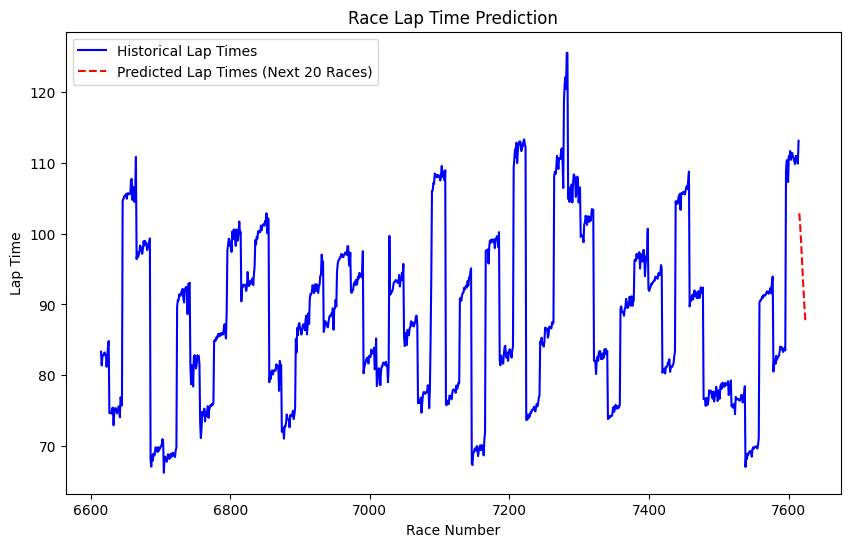

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Supondo que você tenha um DataFrame chamado 'resultados' com uma coluna 'volta_rapida_tempo'

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(resultados['volta_rapida_tempo'].values.reshape(-1, 1))

# Preparar dados para o modelo
x_train, y_train = [], []
for i in range(40, len(scaled_data)):
    x_train.append(scaled_data[i-40:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape para atender aos padrões do TensorFlow
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Criar modelo RNN
model = Sequential()
model.add(LSTM(units=25, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=25, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(x_train, y_train, epochs=5, batch_size=64)

# Prever tempos de corrida futuros (próximas 20 corridas)
future_races = 10
x_future = scaled_data[-40:].reshape(1, -1, 1)
predictions = []

for _ in range(future_races):
    prediction = model.predict(x_future)
    predictions.append(prediction[0, 0])  # Ajuste para extrair o valor escalar da previsão
    x_future = np.append(x_future[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Desescalar as previsões
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Criar índice de corridas para plotagem
start_index = len(resultados) - 1000  # Mostrar apenas as últimas 100 corridas
end_index = len(resultados)
race_index = np.arange(start=start_index, stop=end_index)

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(race_index, resultados['volta_rapida_tempo'].values[start_index:end_index], label='Historical Lap Times', color='blue')
plt.plot(race_index[-1] + np.arange(1, future_races + 1), predictions, label='Predicted Lap Times (Next 20 Races)', linestyle='dashed', color='red')
plt.title('Race Lap Time Prediction')
plt.xlabel('Race Number')
plt.ylabel('Lap Time')
plt.legend()
plt.show()


In [72]:
scaled_data

array([[0.44578313],
       [0.46987952],
       [0.46987952],
       ...,
       [0.42168675],
       [0.28915663],
       [0.08433735]])

In [ ]:
def convert_to_seconds(time_str):
    try:
        # Tenta converter para o formato 'MM:SS.SSS'
        return pd.to_datetime(time_str, format='%M:%S.%f').minute * 60 + pd.to_datetime(time_str, format='%M:%S.%f').second + pd.to_datetime(time_str, format='%M:%S.%f').microsecond / 1e6
    except ValueError:
        # Se falhar, tenta converter para o formato 'HH:MM:SS.SSS'
        return pd.to_datetime(time_str, format='%H:%M:%S.%f').hour * 3600 + pd.to_datetime(time_str, format='%H:%M:%S.%f').minute * 60 + pd.to_datetime(time_str, format='%H:%M:%S.%f').second + pd.to_datetime(time_str, format='%H:%M:%S.%f').microsecond / 1e6

# Aplica a função para converter os tempos para segundos


Epoch 1/5
474/474 [==============================] - 9s 14ms/step - loss: 0.0030
Epoch 2/5
474/474 [==============================] - 7s 14ms/step - loss: 0.0019
Epoch 3/5
474/474 [==============================] - 7s 14ms/step - loss: 0.0016
Epoch 4/5
474/474 [==============================] - 6s 13ms/step - loss: 0.0015
Epoch 5/5
1/1 [==============================] - 0s 13ms/step


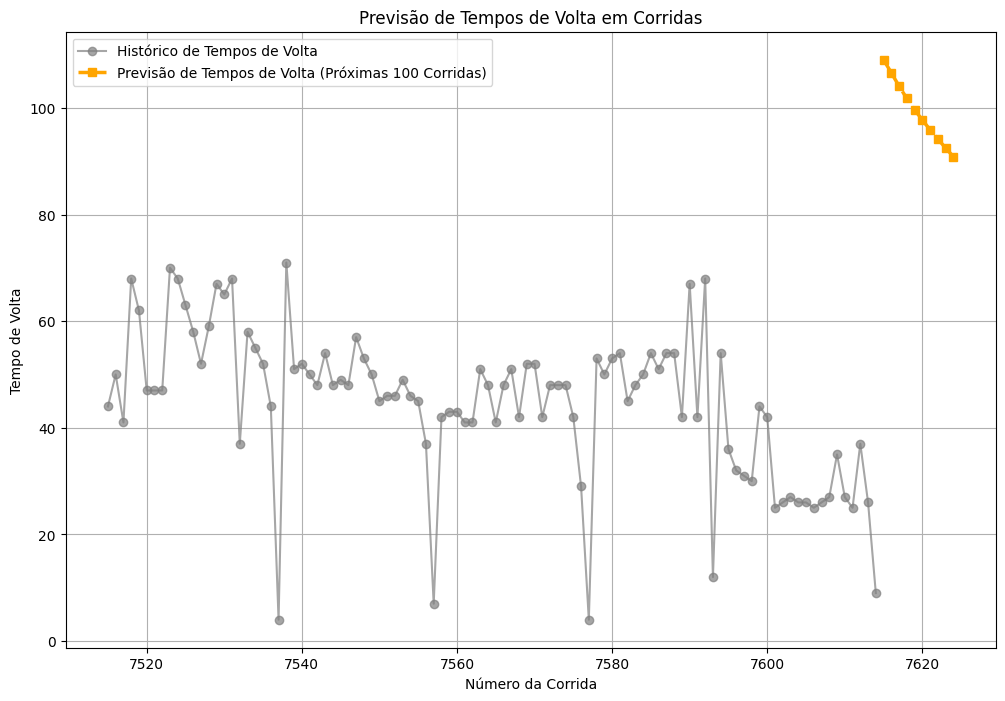

Epoch 1/50
39/39 [==============================] - 2s 10ms/step - loss: 0.0071
Epoch 2/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0043
Epoch 3/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 4/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 5/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0043
Epoch 6/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 7/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 8/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 9/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 10/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 11/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 12/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 13/50
39/39 [==================

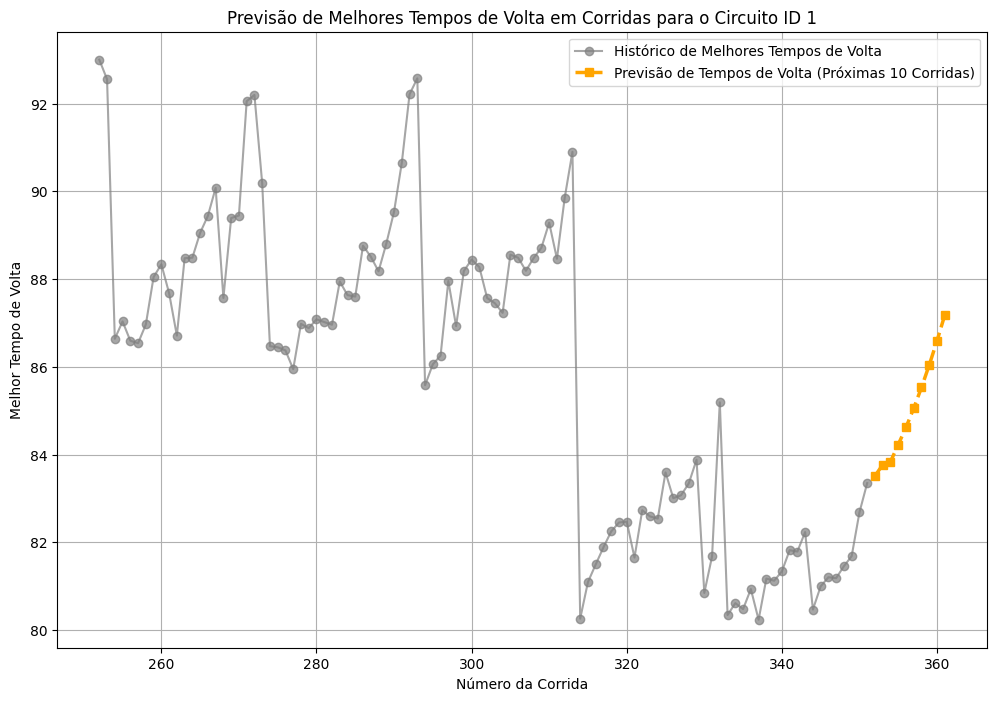

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Mesclar corridas com resultados
merged_data = pd.merge(corridas, resultados, how='inner', on='corrida_id')
merged_data = merged_data[merged_data['circuito_id'] == 1]

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(merged_data['volta_rapida_tempo'].values.reshape(-1, 1))

# Preparar dados para o modelo
x_train, y_train = [], []
for i in range(40, len(scaled_data)):
    x_train.append(scaled_data[i-40:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape para atender aos padrões do TensorFlow
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Criar modelo RNN
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(x_train, y_train, epochs=50, batch_size=8)

# Prever tempos de volta futuros (próximas 10 corridas)
future_races = 10
x_future = scaled_data[-40:].reshape(1, -1, 1)
predictions = []

for _ in range(future_races):
    prediction = model.predict(x_future)
    predictions.append(prediction[0, 0])  # Ajuste para extrair o valor escalar da previsão
    x_future = np.append(x_future[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Desescalar as previsões
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Criar índice de corridas para plotagem da previsão
start_index = len(merged_data) - 100  # Mostrar apenas as últimas 100 corridas
end_index = len(merged_data)
race_index = np.arange(start=start_index, stop=end_index)
future_race_index = np.arange(start=end_index, stop=end_index + future_races)

# Plotar resultados com mais ênfase na previsão
plt.figure(figsize=(12, 8))
plt.plot(race_index, merged_data['volta_rapida_tempo'].values[start_index:end_index], label='Histórico de Melhores Tempos de Volta', marker='o', linestyle='-', color='gray', alpha=0.7)
plt.plot(future_race_index, predictions, label='Previsão de Tempos de Volta (Próximas 10 Corridas)', linestyle='dashed', marker='s', color='orange', linewidth=2.5)
plt.title('Previsão de Melhores Tempos de Volta em Corridas para o Circuito ID 1')
plt.xlabel('Número da Corrida')
plt.ylabel('Melhor Tempo de Volta')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
resultados = resultados.rename(columns={'corridas_id': 'corrida_id'})

In [8]:
# Mesclar corridas com tempo_por_volta
merged_data = pd.merge(corridas, resultados, how='inner', on='corrida_id')
merged_data = merged_data[merged_data['circuito_id'] == 1]


In [1]:
merged_data

NameError: name 'merged_data' is not defined

In [118]:
merged_data

,corrida_id,ano,rodada,circuito_id,nome,data,hora,fp1_data,fp1_hora,fp2_data,...,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,rank,volta_rapida_tempo,volta_rapida_velocidade,status_id
0,1,2009,1,1,Australian Grand Prix,2009-03-29,1900-01-01 06:00:00,NaN,NaN,NaN,...,1,10.0,58,1:34:15.784,5655784.0,17.0,3.0,88.020,216.891,1
1,1,2009,1,1,Australian Grand Prix,2009-03-29,1900-01-01 06:00:00,NaN,NaN,NaN,...,2,8.0,58,+0.807,5656591.0,43.0,14.0,89.066,214.344,1
2,1,2009,1,1,Australian Grand Prix,2009-03-29,1900-01-01 06:00:00,NaN,NaN,NaN,...,3,6.0,58,+1.604,5657388.0,50.0,10.0,88.916,214.706,1
3,1,2009,1,1,Australian Grand Prix,2009-03-29,1900-01-01 06:00:00,NaN,NaN,NaN,...,4,5.0,58,+4.435,5660219.0,53.0,6.0,88.416,215.920,1
4,1,2009,1,1,Australian Grand Prix,2009-03-29,1900-01-01 06:00:00,NaN,NaN,NaN,...,5,4.0,58,+4.879,5660663.0,53.0,9.0,88.712,215.199,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7433,1100,2023,3,1,Australian Grand Prix,2023-04-02,1900-01-01 05:00:00,2023-03-31,1900-01-01 01:30:00,2023-03-31,...,15,0.0,56,NaN,NaN,50.0,10.0,81.183,234.049,4
7434,1100,2023,3,1,Australian Grand Prix,2023-04-02,1900-01-01 05:00:00,2023-03-31,1900-01-01 01:30:00,2023-03-31,...,16,0.0,56,NaN,NaN,50.0,13.0,81.456,233.264,4
7435,1100,2023,3,1,Australian Grand Prix,2023-04-02,1900-01-01 05:00:00,2023-03-31,1900-01-01 01:30:00,2023-03-31,...,17,0.0,52,NaN,NaN,52.0,14.0,81.685,232.610,3
7436,1100,2023,3,1,Australian Grand Prix,2023-04-02,1900-01-01 05:00:00,2023-03-31,1900-01-01 01:30:00,2023-03-31,...,18,0.0,17,NaN,NaN,16.0,18.0,82.680,229.811,5


In [35]:
circuitos

,circuito_id,circuito_ref,nome,localizacao,pais,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18.0
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7.0
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109.0
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130.0
...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108.0
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255.0
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15.0
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,NaN


In [48]:
merged_data = pd.merge(corridas, resultados, how='inner', on='corrida_id')
merged_data = merged_data[merged_data['circuito_id'] == 14]
merged_data = merged_data[merged_data['piloto_id'] == 1]
merged_data

,corrida_id,ano,rodada,circuito_id,nome,data,hora,fp1_data,fp1_hora,fp2_data,...,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,rank,volta_rapida_tempo,volta_rapida_velocidade,status_id
238,13,2009,13,14,Italian Grand Prix,2009-09-13,1900-01-01 12:00:00,NaN,NaN,NaN,...,12,0.0,52,NaN,NaN,52.0,3.0,84.802,245.923,3
581,31,2008,14,14,Italian Grand Prix,2008-09-14,1900-01-01 12:00:00,NaN,NaN,NaN,...,7,2.0,53,+29.912,5237406.0,52.0,5.0,89.721,232.440,1
925,48,2007,13,14,Italian Grand Prix,2007-09-09,1900-01-01 12:00:00,NaN,NaN,NaN,...,2,8.0,53,+6.062,4723868.0,17.0,2.0,82.936,251.456,1
2816,853,2011,13,14,Italian Grand Prix,2011-09-11,1900-01-01 12:00:00,NaN,NaN,NaN,...,4,12.0,53,+17.417,4863589.0,52.0,1.0,86.187,241.971,1
3249,872,2012,13,14,Italian Grand Prix,2012-09-09,1900-01-01 12:00:00,NaN,NaN,NaN,...,1,25.0,53,1:19:41.221,4781221.0,52.0,5.0,88.427,235.841,1
3681,892,2013,12,14,Italian Grand Prix,2013-09-08,1900-01-01 12:00:00,NaN,NaN,NaN,...,9,2.0,53,+33.527,4746879.0,51.0,1.0,85.849,242.924,1
4095,912,2014,13,14,Italian Grand Prix,2014-09-07,1900-01-01 12:00:00,NaN,NaN,NaN,...,1,25.0,53,1:19:10.236,4750236.0,29.0,1.0,88.004,236.975,1
4436,938,2015,12,14,Italian Grand Prix,2015-09-06,1900-01-01 12:00:00,NaN,NaN,NaN,...,1,25.0,53,1:18:00.688,4680688.0,48.0,1.0,86.672,240.617,1
4863,961,2016,14,14,Italian Grand Prix,2016-09-04,1900-01-01 12:00:00,NaN,NaN,NaN,...,2,18.0,53,+15.070,4663159.0,27.0,4.0,86.303,241.646,1
5255,981,2017,13,14,Italian Grand Prix,2017-09-03,1900-01-01 12:00:00,NaN,NaN,NaN,...,1,25.0,53,1:15:32.312,4532312.0,50.0,2.0,83.488,249.793,1


Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.1345
Epoch 2/200
1/1 [==============================] - 0s 6ms/step - loss: 0.0866
Epoch 3/200
1/1 [==============================] - 0s 6ms/step - loss: 0.0496
Epoch 4/200
1/1 [==============================] - 0s 7ms/step - loss: 0.0207
Epoch 5/200
1/1 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 6/200
1/1 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 7/200
1/1 [==============================] - 0s 7ms/step - loss: 0.0170
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 0.0184
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 0.0100
Epoch 10/200
1/1 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 11/200
1/1 [==============================] - 0s 7ms/step - loss: 1.2895e-05
Epoch 12/200
1/1 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 13/200
1/1 [==============================] - 0s 7ms

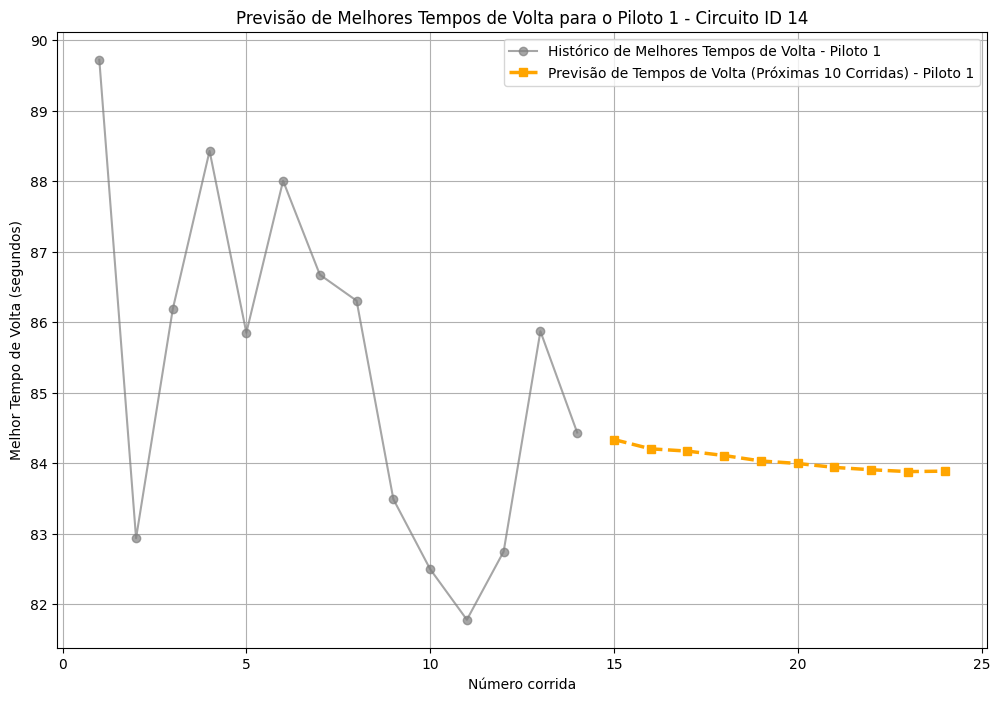

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Suponha que você tenha um ID de piloto específico
piloto_id = 1  # Substitua pelo ID do piloto desejado

# Filtrar resultados para um piloto específico
resultados_piloto = resultados[resultados['piloto_id'] == piloto_id]

# Mesclar corridas com resultados
merged_data = pd.merge(corridas, resultados_piloto, how='inner', on='corrida_id')
merged_data = merged_data[merged_data['circuito_id'] == 14]

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(merged_data['volta_rapida_tempo'].values.reshape(-1, 1))

# Verificar se há dados suficientes para treinar o modelo
if len(scaled_data) <= 2:
    print("Não há dados suficientes para treinar o modelo.")
else:
    # Definir o número de amostras de treinamento
    time_steps = min(40, len(scaled_data) - 1)

    # Preparar dados para o modelo
    x_train, y_train = [], []
    for i in range(time_steps, len(scaled_data)):
        x_train.append(scaled_data[i - time_steps:i, 0])
        y_train.append(scaled_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape para atender aos padrões do TensorFlow
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Criar modelo RNN
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=100, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Treinar o modelo com mais épocas
    model.fit(x_train, y_train, epochs=200, batch_size=8)

    # Verificar se há dados suficientes para prever as próximas corridas
    if len(scaled_data) > time_steps:
        # Prever tempos de volta futuros (próximas 10 corridas)
        future_races = 10
        x_future = scaled_data[-time_steps:].reshape(1, -1, 1)
        predictions = []

        for _ in range(future_races):
            prediction = model.predict(x_future)
            predictions.append(prediction[0, 0])
            x_future = np.append(x_future[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

        # Desescalar as previsões
        predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

        # Criar índice de corridas para plotagem da previsão
        start_index = max(len(merged_data) - time_steps, 0)  # Mostrar apenas as últimas corridas disponíveis
        end_index = len(merged_data)
        race_index = np.arange(start=start_index, stop=end_index)
        future_race_index = np.arange(start=end_index, stop=end_index + future_races)

        # Plotar resultados com mais ênfase na previsão
        plt.figure(figsize=(12, 8))
        plt.plot(race_index, merged_data['volta_rapida_tempo'].values[start_index:end_index], label=f'Histórico de Melhores Tempos de Volta - Piloto {piloto_id}', marker='o', linestyle='-', color='gray', alpha=0.7)
        plt.plot(future_race_index, predictions, label=f'Previsão de Tempos de Volta (Próximas {future_races} Corridas) - Piloto {piloto_id}', linestyle='dashed', marker='s', color='orange', linewidth=2.5)
        plt.title(f'Previsão de Melhores Tempos de Volta para o Piloto {piloto_id} - Circuito ID 14')
        plt.xlabel('Número corrida')
        plt.ylabel('Melhor Tempo de Volta (segundos)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Não há dados suficientes para prever as próximas corridas.")


In [65]:
piloto_id = 1  # Substitua pelo ID do piloto desejado

# Filtrar resultados para um piloto específico
resultados_piloto = resultados[resultados['piloto_id'] == piloto_id]

# Mesclar corridas com resultados
merged_data = pd.merge(corridas, resultados_piloto, how='inner', on='corrida_id')
merged_data = merged_data[merged_data['circuito_id'] == 14]
merged_data

,corrida_id,ano,rodada,circuito_id,nome,data,hora,fp1_data,fp1_hora,fp2_data,...,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,rank,volta_rapida_tempo,volta_rapida_velocidade,status_id
11,13,2009,13,14,Italian Grand Prix,2009-09-13,1900-01-01 12:00:00,NaN,NaN,NaN,...,12,0.0,52,NaN,NaN,52.0,3.0,84.802,245.923,3
29,31,2008,14,14,Italian Grand Prix,2008-09-14,1900-01-01 12:00:00,NaN,NaN,NaN,...,7,2.0,53,+29.912,5237406.0,52.0,5.0,89.721,232.440,1
46,48,2007,13,14,Italian Grand Prix,2007-09-09,1900-01-01 12:00:00,NaN,NaN,NaN,...,2,8.0,53,+6.062,4723868.0,17.0,2.0,82.936,251.456,1
81,853,2011,13,14,Italian Grand Prix,2011-09-11,1900-01-01 12:00:00,NaN,NaN,NaN,...,4,12.0,53,+17.417,4863589.0,52.0,1.0,86.187,241.971,1
99,872,2012,13,14,Italian Grand Prix,2012-09-09,1900-01-01 12:00:00,NaN,NaN,NaN,...,1,25.0,53,1:19:41.221,4781221.0,52.0,5.0,88.427,235.841,1
118,892,2013,12,14,Italian Grand Prix,2013-09-08,1900-01-01 12:00:00,NaN,NaN,NaN,...,9,2.0,53,+33.527,4746879.0,51.0,1.0,85.849,242.924,1
138,912,2014,13,14,Italian Grand Prix,2014-09-07,1900-01-01 12:00:00,NaN,NaN,NaN,...,1,25.0,53,1:19:10.236,4750236.0,29.0,1.0,88.004,236.975,1
156,938,2015,12,14,Italian Grand Prix,2015-09-06,1900-01-01 12:00:00,NaN,NaN,NaN,...,1,25.0,53,1:18:00.688,4680688.0,48.0,1.0,86.672,240.617,1
176,961,2016,14,14,Italian Grand Prix,2016-09-04,1900-01-01 12:00:00,NaN,NaN,NaN,...,2,18.0,53,+15.070,4663159.0,27.0,4.0,86.303,241.646,1
196,981,2017,13,14,Italian Grand Prix,2017-09-03,1900-01-01 12:00:00,NaN,NaN,NaN,...,1,25.0,53,1:15:32.312,4532312.0,50.0,2.0,83.488,249.793,1


1/1 [==============================] - 0s 17ms/step


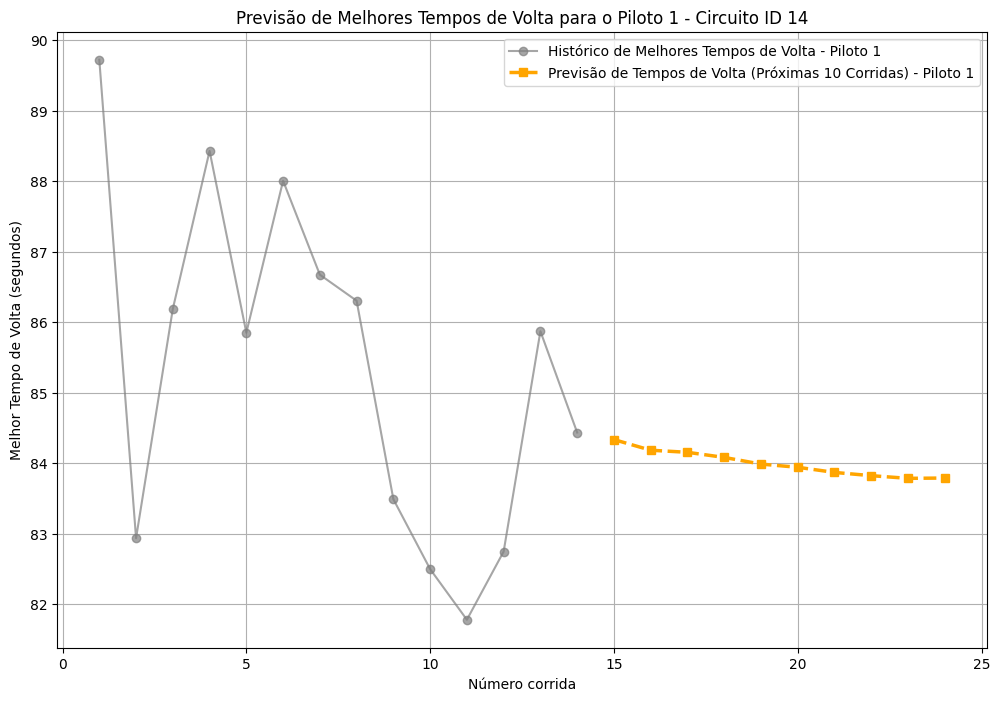

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Suponha que você tenha um ID de piloto específico
piloto_id = 1  # Substitua pelo ID do piloto desejado

# Filtrar resultados para um piloto específico
resultados_piloto = resultados[resultados['piloto_id'] == piloto_id]

# Mesclar corridas com resultados
merged_data = pd.merge(corridas, resultados_piloto, how='inner', on='corrida_id')
merged_data = merged_data[merged_data['circuito_id'] == 14]

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(merged_data['volta_rapida_tempo'].values.reshape(-1, 1))

# Verificar se há dados suficientes para treinar o modelo
if len(scaled_data) <= 2:
    print("Não há dados suficientes para treinar o modelo.")
else:
    # Definir o número de amostras de treinamento
    time_steps = min(40, len(scaled_data) - 1)

    # Preparar dados para o modelo
    x_train, y_train = [], []
    for i in range(time_steps, len(scaled_data)):
        x_train.append(scaled_data[i - time_steps:i, 0])
        y_train.append(scaled_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape para atender aos padrões do TensorFlow
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Criar modelo RNN
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=100, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Treinar o modelo com mais épocas
    model.fit(x_train, y_train, epochs=200, batch_size=8, verbose=0)

    # Verificar se há dados suficientes para prever as próximas corridas
    if len(scaled_data) > time_steps:
        # Prever tempos de volta futuros (próximas 10 corridas)
        future_races = 10
        x_future = scaled_data[-time_steps:].reshape(1, time_steps, 1)
        predictions = []

        for _ in range(future_races):
            prediction = model.predict(x_future)
            predictions.append(prediction[0, 0])
            x_future = np.append(x_future[:, 1:], prediction.reshape(1, 1, 1), axis=1)

        # Desescalar as previsões
        predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

        # Criar índice de corridas para plotagem da previsão
        race_index = np.arange(len(merged_data) - time_steps, len(merged_data))
        future_race_index = np.arange(len(merged_data), len(merged_data) + future_races)

        # Plotar resultados com mais ênfase na previsão
        plt.figure(figsize=(12, 8))
        plt.plot(race_index, merged_data['volta_rapida_tempo'].values[-time_steps:], label=f'Histórico de Melhores Tempos de Volta - Piloto {piloto_id}', marker='o', linestyle='-', color='gray', alpha=0.7)
        plt.plot(future_race_index, predictions, label=f'Previsão de Tempos de Volta (Próximas {future_races} Corridas) - Piloto {piloto_id}', linestyle='dashed', marker='s', color='orange', linewidth=2.5)
        plt.title(f'Previsão de Melhores Tempos de Volta para o Piloto {piloto_id} - Circuito ID 14')
        plt.xlabel('Número corrida')
        plt.ylabel('Melhor Tempo de Volta (segundos)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Não há dados suficientes para prever as próximas corridas.")


In [92]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Suponha que você tenha um ID de piloto específico
piloto_id = 1  # Substitua pelo ID do piloto desejado

# Filtrar resultados para um piloto específico
resultados_piloto = resultados[resultados['piloto_id'] == piloto_id]

# Mesclar corridas com resultados
merged_data = pd.merge(corridas, resultados_piloto, how='inner', on='corrida_id')
merged_data = merged_data[merged_data['circuito_id'] == 14]

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(merged_data['volta_rapida_tempo'].values.reshape(-1, 1))

# Verificar se há dados suficientes para treinar o modelo
if len(scaled_data) <= 2:
    print("Não há dados suficientes para treinar o modelo.")
else:
    # Definir o número de amostras de treinamento
    time_steps = min(40, len(scaled_data) - 1)

    # Preparar dados para o modelo
    x_train, y_train = [], []
    for i in range(time_steps, len(scaled_data)):
        x_train.append(scaled_data[i - time_steps:i, 0])
        y_train.append(scaled_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape para atender aos padrões do TensorFlow
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Criar modelo RNN
    model = Sequential()
    model.add(LSTM(units=200, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=200, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Treinar o modelo com mais épocas
    model.fit(x_train, y_train, epochs=500, batch_size=120, verbose=0)

    # Verificar se há dados suficientes para prever as próximas corridas
    if len(scaled_data) > time_steps:
        # Prever tempos de volta futuros (próximas 10 corridas)
        future_races = 10
        x_future = scaled_data[-time_steps:].reshape(1, time_steps, 1)
        predictions = []

        for _ in range(future_races):
            prediction = model.predict(x_future)
            predictions.append(prediction[0, 0])
            x_future = np.append(x_future[:, 1:], prediction.reshape(1, 1, 1), axis=1)

        # Desescalar as previsões
        predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

        # Imprimir as previsões em segundos
        print(f"Previsões de Melhores Tempos de Volta para o Piloto {piloto_id} - Circuito ID 14:")
        for i, pred in enumerate(predictions):
            print(f"Corrida {len(merged_data) + i + 1}: {pred[0]:.3f} segundos")
    else:
        print("Não há dados suficientes para prever as próximas corridas.")


1/1 [==============================] - 0s 14ms/step
Previsões de Melhores Tempos de Volta para o Piloto 1 - Circuito ID 14:
Corrida 16: 84.333 segundos
Corrida 17: 84.201 segundos
Corrida 18: 84.170 segundos
Corrida 19: 84.108 segundos
Corrida 20: 84.030 segundos
Corrida 21: 83.994 segundos
Corrida 22: 83.936 segundos
Corrida 23: 83.900 segundos
Corrida 24: 83.871 segundos
Corrida 25: 83.874 segundos


In [83]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Suponha que você tenha um ID de piloto específico
piloto_id = 1  # Substitua pelo ID do piloto desejado

# Filtrar resultados para um piloto específico
resultados_piloto = resultados[resultados['piloto_id'] == piloto_id]

# Mesclar corridas com resultados
merged_data = pd.merge(corridas, resultados_piloto, how='inner', on='corrida_id')
merged_data = merged_data[merged_data['circuito_id'] == 14]

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(merged_data['volta_rapida_tempo'].values.reshape(-1, 1))

# Verificar se há dados suficientes para treinar o modelo
if len(scaled_data) <= 2:
    print("Não há dados suficientes para treinar o modelo.")
else:
    # Definir o número de amostras de treinamento
    time_steps = min(40, len(scaled_data) - 1)

    # Preparar dados para o modelo
    x_train, y_train = [], []
    for i in range(time_steps, len(scaled_data)):
        x_train.append(scaled_data[i - time_steps:i, 0])
        y_train.append(scaled_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape para atender aos padrões do TensorFlow
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Criar modelo RNN
    model = Sequential()
    model.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=150, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Treinar o modelo com mais épocas
    model.fit(x_train, y_train, epochs=400, batch_size=8)

    # Verificar se há dados suficientes para prever as próximas corridas
    if len(scaled_data) > time_steps:
        # Prever tempos de volta futuros (próximas 3 corridas)
        future_races = 3
        x_future = scaled_data[-time_steps:].reshape(1, -1, 1)
        predictions = []

        for _ in range(future_races):
            prediction = model.predict(x_future)
            predictions.append(prediction[0, 0])
            x_future = np.append(x_future[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

        # Desescalar as previsões
        predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

        # Mostrar as previsões
        print(f"Previsões de Melhores Tempos de Volta para o Piloto {piloto_id} - Circuito ID 14:")
        for i in range(future_races):
            print(f"Corrida {len(merged_data) + i + 1}: {predictions[i][0]:.3f} segundos")
    else:
        print("Não há dados suficientes para prever as próximas corridas.")
merged_data

Epoch 1/400
1/1 [==============================] - 2s 2s/step - loss: 0.1076
Epoch 2/400
1/1 [==============================] - 0s 7ms/step - loss: 0.0503
Epoch 3/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0118
Epoch 4/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 5/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0212
Epoch 6/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0149
Epoch 7/400
1/1 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 8/400
1/1 [==============================] - 0s 9ms/step - loss: 1.2656e-04
Epoch 9/400
1/1 [==============================] - 0s 9ms/step - loss: 0.0035
Epoch 10/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0076
Epoch 11/400
1/1 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 12/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0084
Epoch 13/400
1/1 [==============================] - 0s 8ms

,corrida_id,ano,rodada,circuito_id,nome,data,hora,fp1_data,fp1_hora,fp2_data,...,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,rank,volta_rapida_tempo,volta_rapida_velocidade,status_id
11,13,2009,13,14,Italian Grand Prix,2009-09-13,1900-01-01 12:00:00,NaN,NaN,NaN,...,12,0.0,52,NaN,NaN,52.0,3.0,84.802,245.923,3
29,31,2008,14,14,Italian Grand Prix,2008-09-14,1900-01-01 12:00:00,NaN,NaN,NaN,...,7,2.0,53,+29.912,5237406.0,52.0,5.0,89.721,232.440,1
46,48,2007,13,14,Italian Grand Prix,2007-09-09,1900-01-01 12:00:00,NaN,NaN,NaN,...,2,8.0,53,+6.062,4723868.0,17.0,2.0,82.936,251.456,1
81,853,2011,13,14,Italian Grand Prix,2011-09-11,1900-01-01 12:00:00,NaN,NaN,NaN,...,4,12.0,53,+17.417,4863589.0,52.0,1.0,86.187,241.971,1
99,872,2012,13,14,Italian Grand Prix,2012-09-09,1900-01-01 12:00:00,NaN,NaN,NaN,...,1,25.0,53,1:19:41.221,4781221.0,52.0,5.0,88.427,235.841,1
118,892,2013,12,14,Italian Grand Prix,2013-09-08,1900-01-01 12:00:00,NaN,NaN,NaN,...,9,2.0,53,+33.527,4746879.0,51.0,1.0,85.849,242.924,1
138,912,2014,13,14,Italian Grand Prix,2014-09-07,1900-01-01 12:00:00,NaN,NaN,NaN,...,1,25.0,53,1:19:10.236,4750236.0,29.0,1.0,88.004,236.975,1
156,938,2015,12,14,Italian Grand Prix,2015-09-06,1900-01-01 12:00:00,NaN,NaN,NaN,...,1,25.0,53,1:18:00.688,4680688.0,48.0,1.0,86.672,240.617,1
176,961,2016,14,14,Italian Grand Prix,2016-09-04,1900-01-01 12:00:00,NaN,NaN,NaN,...,2,18.0,53,+15.070,4663159.0,27.0,4.0,86.303,241.646,1
196,981,2017,13,14,Italian Grand Prix,2017-09-03,1900-01-01 12:00:00,NaN,NaN,NaN,...,1,25.0,53,1:15:32.312,4532312.0,50.0,2.0,83.488,249.793,1


Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 2.0927e-04
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 5.9928e-04
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 8.0801e-04
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 5.3213e-04
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 1.1627e-05
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 1.9173e-04
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 5.9630e-04
Epoch 11/500
1/1 [==============================] - 0s 10ms/step - loss: 7.1701e-04
Epoch 12/500
1/1 [==============================] - 0s 10ms/step - loss: 5.3122e-04
Epoch 13/500
1/1

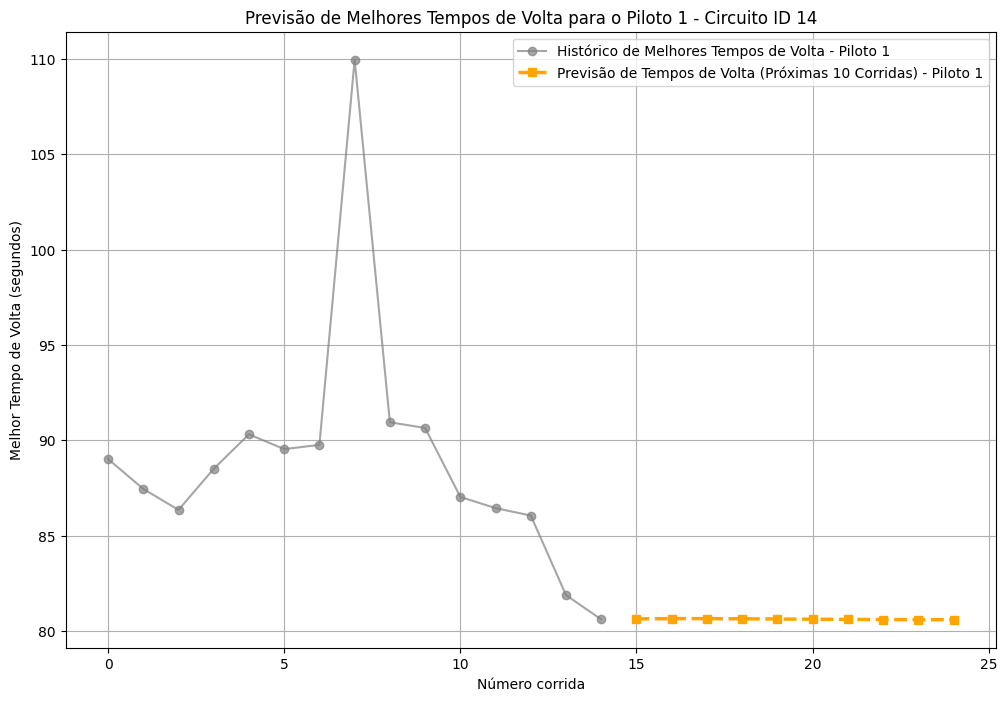

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Suponha que você tenha um ID de piloto específico
piloto_id = 1  # Substitua pelo ID do piloto desejado

# Filtrar resultados para um piloto específico
resultados_piloto = resultados[resultados['piloto_id'] == piloto_id]

# Mesclar corridas com resultados
merged_data = pd.merge(corridas, resultados_piloto, how='inner', on='corrida_id')
merged_data = merged_data[merged_data['circuito_id'] == 1]

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(merged_data['volta_rapida_tempo'].values.reshape(-1, 1))

# Verificar se há dados suficientes para treinar o modelo
if len(scaled_data) <= 2:
    print("Não há dados suficientes para treinar o modelo.")
else:
    # Definir o número de amostras de treinamento
    time_steps = min(40, len(scaled_data) - 1)

    # Preparar dados para o modelo
    x_train, y_train = [], []
    for i in range(time_steps, len(scaled_data)):
        x_train.append(scaled_data[i - time_steps:i, 0])
        y_train.append(scaled_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape para atender aos padrões do TensorFlow
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Criar modelo RNN
    model = Sequential()
    model.add(LSTM(units=200, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=200, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Treinar o modelo com mais épocas
    model.fit(x_train, y_train, epochs=500, batch_size=16)

    # Verificar se há dados suficientes para prever as próximas corridas
    if len(scaled_data) > time_steps:
        # Prever tempos de volta futuros (próximas 3 corridas)
        future_races = 10
        x_future = scaled_data[-time_steps:].reshape(1, -1, 1)
        predictions = []

        for _ in range(future_races):
            prediction = model.predict(x_future)
            predictions.append(prediction[0, 0])
            x_future = np.append(x_future[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

        # Desescalar as previsões
        predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

        # Mostrar as previsões
        print(f"Previsões de Melhores Tempos de Volta para o Piloto {piloto_id} - Circuito ID 14:")
        for i in range(future_races):
            print(f"Corrida {len(merged_data) + i + 1}: {predictions[i][0]:.3f} segundos")

        # Visualização gráfica
        race_index = np.arange(start=len(merged_data), stop=len(merged_data) + future_races)

        plt.figure(figsize=(12, 8))
        plt.plot(np.arange(len(merged_data)), merged_data['volta_rapida_tempo'].values, label=f'Histórico de Melhores Tempos de Volta - Piloto {piloto_id}', marker='o', linestyle='-', color='gray', alpha=0.7)
        plt.plot(race_index, predictions, label=f'Previsão de Tempos de Volta (Próximas {future_races} Corridas) - Piloto {piloto_id}', linestyle='dashed', marker='s', color='orange', linewidth=2.5)
        plt.title(f'Previsão de Melhores Tempos de Volta para o Piloto {piloto_id} - Circuito ID 14')
        plt.xlabel('Número corrida')
        plt.ylabel('Melhor Tempo de Volta (segundos)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Avaliação da Precisão
        real_data = merged_data['volta_rapida_tempo'].values[-future_races:]
        accuracy = 100 - np.abs(predictions - real_data) / real_data * 100
        print(f"Previsão para a Próxima Corrida (Corrida {len(merged_data) + 1}): {prediction:.3f} segundos")
        print(f"Porcentagem de Acerto para as Próximas {future_races} Corridas: {accuracy.mean():.2f}%")
    else:
        print("Não há dados suficientes para prever as próximas corridas.")


Epoch 1/400
1/1 [==============================] - 2s 2s/step - loss: 0.1128
Epoch 2/400
1/1 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 3/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0079
Epoch 4/400
1/1 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 5/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0212
Epoch 6/400
1/1 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 7/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 8/400
1/1 [==============================] - 0s 9ms/step - loss: 2.0705e-04
Epoch 9/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0035
Epoch 10/400
1/1 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 11/400
1/1 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 12/400
1/1 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 13/400
1/1 [==============================] - 0s 8m

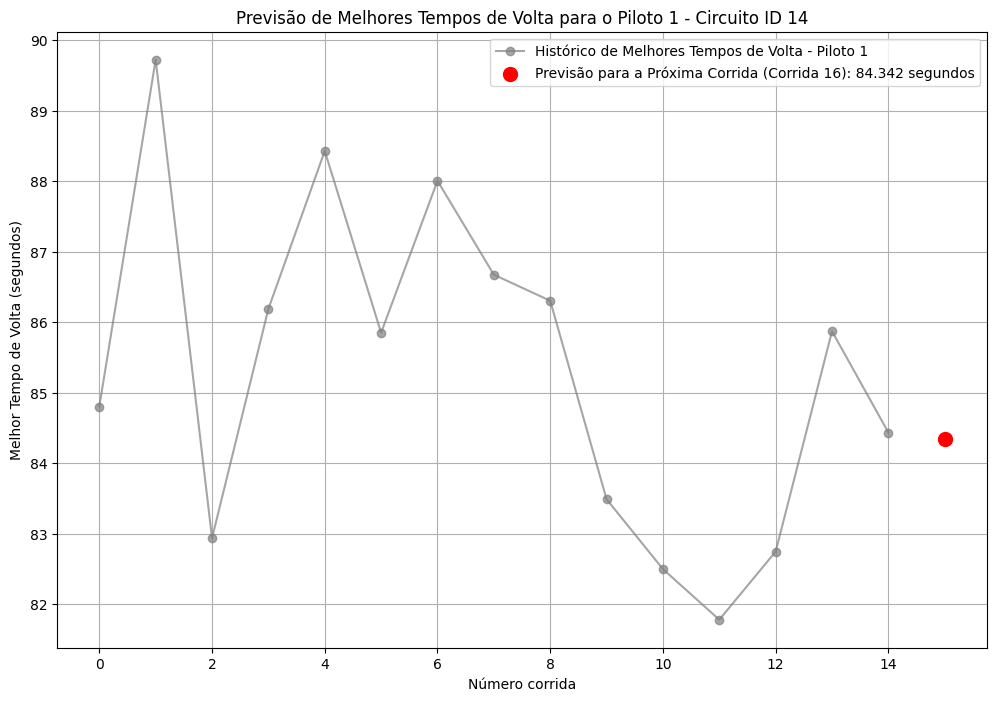

Tempo Real da Última Corrida: 84.434 segundos
Porcentagem de Acerto: 99.89%


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Suponha que você tenha um ID de piloto específico
piloto_id = 1  # Substitua pelo ID do piloto desejado

# Filtrar resultados para um piloto específico
resultados_piloto = resultados[resultados['piloto_id'] == piloto_id]

# Mesclar corridas com resultados
merged_data = pd.merge(corridas, resultados_piloto, how='inner', on='corrida_id')
merged_data = merged_data[merged_data['circuito_id'] == 14]

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(merged_data['volta_rapida_tempo'].values.reshape(-1, 1))

# Verificar se há dados suficientes para treinar o modelo
if len(scaled_data) <= 2:
    print("Não há dados suficientes para treinar o modelo.")
else:
    # Definir o número de amostras de treinamento
    time_steps = min(40, len(scaled_data) - 1)

    # Preparar dados para o modelo
    x_train, y_train = [], []
    for i in range(time_steps, len(scaled_data)):
        x_train.append(scaled_data[i - time_steps:i, 0])
        y_train.append(scaled_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape para atender aos padrões do TensorFlow
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Criar modelo RNN
    model = Sequential()
    model.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=150, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Treinar o modelo com mais épocas
    model.fit(x_train, y_train, epochs=400, batch_size=8)

    # Verificar se há dados suficientes para prever a próxima corrida
    if len(scaled_data) > time_steps:
        # Prever o tempo de volta para a próxima corrida
        x_future = scaled_data[-time_steps:].reshape(1, -1, 1)
        prediction = model.predict(x_future)

        # Desescalar a previsão
        prediction = scaler.inverse_transform(prediction.reshape(-1, 1))[0, 0]

        # Plotar resultados com ênfase na previsão
        plt.figure(figsize=(12, 8))
        plt.plot(merged_data['volta_rapida_tempo'].values, label=f'Histórico de Melhores Tempos de Volta - Piloto {piloto_id}', marker='o', linestyle='-', color='gray', alpha=0.7)
        plt.scatter(len(merged_data), prediction, label=f'Previsão para a Próxima Corrida (Corrida {len(merged_data) + 1}): {prediction:.3f} segundos', color='red', s=100)
        plt.title(f'Previsão de Melhores Tempos de Volta para o Piloto {piloto_id} - Circuito ID 14')
        plt.xlabel('Número corrida')
        plt.ylabel('Melhor Tempo de Volta (segundos)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Avaliação da Precisão
        last_real_data_index = len(merged_data) - 1
        real_data = merged_data['volta_rapida_tempo'].values[last_real_data_index]
        accuracy = 100 - np.abs(prediction - real_data) / real_data * 100
        print(f"Tempo Real da Última Corrida: {real_data:.3f} segundos")
        print(f"Porcentagem de Acerto: {accuracy:.2f}%")
    else:
        print("Não há dados suficientes para prever a próxima corrida.")
